## CIFAR-10 UAP - Attack Generation
We generate (via SGD), visualize, and evaluate the following UAPs:
1. Untargeted UAP
2. Targeted UAP

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import torch

from attacks import uap_sgd
from utils import loader_cifar, model_cifar, evaluate

dir_data = '/data/cifar10'
dir_uap = './uaps/cifar10/'
testloader = loader_cifar(dir_data = dir_data, train = False)
trainloader = loader_cifar(dir_data = dir_data, train = True)

Files already downloaded and verified
Files already downloaded and verified


In [2]:
# load model
model, best_acc = model_cifar('resnet18', ckpt_path = './resnet18.pth')
print(best_acc)

94.02


## 1. Untargeted UAP

In [3]:
nb_epoch = 10
eps = 10 / 255
uap, losses = uap_sgd(model, testloader, nb_epoch, eps)

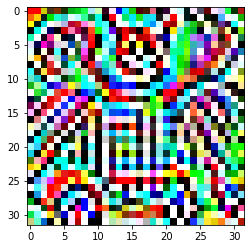

In [4]:
# visualize UAP
plt.imshow(np.transpose(((uap / eps) + 1) / 2, (1, 2, 0)))

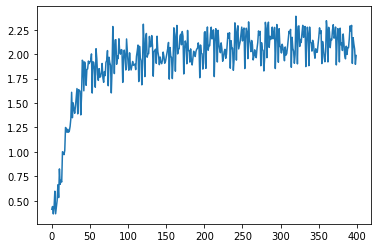

In [5]:
# plot loss
plt.plot(losses)

In [6]:
# evaluate
_, _, _, _, outputs, labels = evaluate(model, testloader, uap = uap)
print('Accuracy:', sum(outputs == labels) / len(labels))

Accuracy: 0.5342


(array([1000., 1000., 1000., 1000., 1000., 1000., 1000., 1000., 1000.,
        1000.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <a list of 10 Patch objects>)

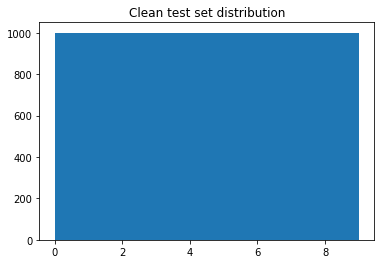

In [7]:
# plot histogram
plt.title('Clean test set distribution')
plt.hist(labels)

(array([ 865.,  699.,  837., 2023.,  939.,  943.,  804., 1079.,  734.,
        1077.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <a list of 10 Patch objects>)

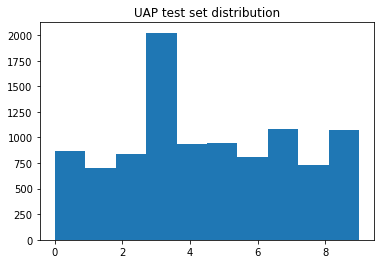

In [8]:
# plot histogram
plt.title('UAP test set distribution')
plt.hist(outputs)

## 2. Targeted UAP

In [9]:
nb_epoch = 10
eps = 10 / 255
y_target = 7
uap, losses = uap_sgd(model, testloader, nb_epoch, eps, y_target = y_target)

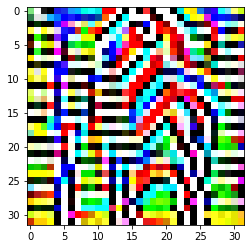

In [10]:
# visualize UAP
plt.imshow(np.transpose(((uap / eps) + 1) / 2, (1, 2, 0)))

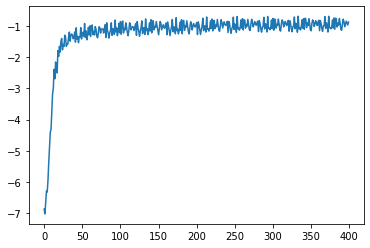

In [11]:
# plot loss
plt.plot(losses)

In [12]:
# evaluate
_, _, _, _, outputs, labels = evaluate(model, testloader, uap = uap)
print('Accuracy:', sum(outputs == labels) / len(labels))
print('Targeted success rate:', sum(outputs == y_target) / len(labels))

Accuracy: 0.2463
Targeted success rate: 0.8016


(array([1000., 1000., 1000., 1000., 1000., 1000., 1000., 1000., 1000.,
        1000.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <a list of 10 Patch objects>)

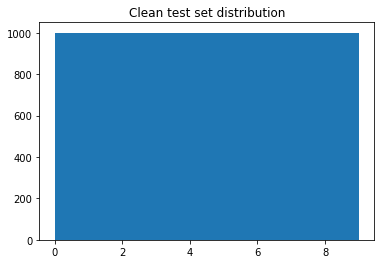

In [13]:
# plot histogram
plt.title('Clean test set distribution')
plt.hist(labels)

(array([ 387.,  239.,  284.,   30.,  185.,  199.,  241., 8016.,  243.,
         176.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <a list of 10 Patch objects>)

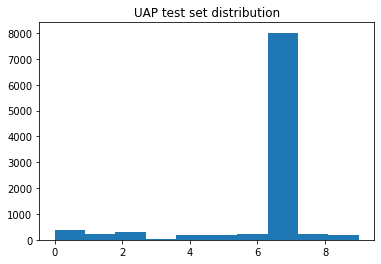

In [14]:
# plot histogram
plt.title('UAP test set distribution')
plt.hist(outputs)